### Import des libraires :

In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=4acca66108d41de53be2919a8a4d95337e813b252bca7e13ef3e6f6c497a557c
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=50eee6f4cb9ac6ac2292821579751d0b0bfa91bc8a21e64e4bc941956c097f66
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
import pandas as pd
import numpy as np
import IPython.display
import re

# Pour la visualisation graphique :
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import plotly.express as px

# Pour supprimer les warnings :
import warnings
warnings.filterwarnings("ignore")

# Pour l'optimisation des algos :
from sklearn.model_selection import GridSearchCV

# Pour le BOW :
from nltk.tokenize import word_tokenize

# Pour le tf-idf :
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# pour les algorithmes supervisés :
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

# Pour les scores :
from sklearn import metrics
from sklearn.metrics import accuracy_score, jaccard_score, hamming_loss
from sklearn.metrics import roc_auc_score

# Pour la PCA : 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler # classe pour standardisation
from sklearn import preprocessing
from sklearn import decomposition

# Pour la LDA : 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Pour la NMF :
from sklearn.decomposition import NMF

# Pour la visualisation des tokens :
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

# Pour pyLDAvis :
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_visualisation = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/Stackoverflow/p5_visualisation_part_1.pkl")

### Mise en place de la limite des 50 tags :

In [ ]:
df_modellisation = df_visualisation[[
    'corpus_preprocessing', 'tags_preprocessing']]
df_modellisation

,corpus_preprocessing,tags_preprocessing
0,"[delete, form, loop, form, option, image, inpu...","[php, foreach, pdo, associative-array]"
1,"[df, pd.DataFrame, df.isnull, df2.set_index, d...","[python, dataframe]"
2,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]"
3,"[verification, user, authenticationI, verify, ...","[python, oauth-2.0, jwt, rsa, jwk]"
4,"[work, context, manager, example, manager, fil...","[python, contextmanager]"
...,...,...
65997,"[logout, error, authentication, register, logi...","[python, django, postman]"
65998,"[code, workingI, game, problem, code, function...",[python]
65999,"[function, macro, definition, source, file, fr...","[c, gcc, macros, gdb]"
66000,"[way, distance, arraysI, z, y1, z1, yN, zN, b,...","[python, loops, euclidean-distance]"


In [ ]:
df_modellisation['corpus_finish'] = df_modellisation['corpus_preprocessing'].apply(
    lambda x: " ".join(x))
df_modellisation['tags_finish'] = df_modellisation['tags_preprocessing'].apply(
    lambda x: " ".join(x))
df_modellisation

,corpus_preprocessing,tags_preprocessing,corpus_finish,tags_finish
0,"[delete, form, loop, form, option, image, inpu...","[php, foreach, pdo, associative-array]",delete form loop form option image input form ...,php foreach pdo associative-array
1,"[df, pd.DataFrame, df.isnull, df2.set_index, d...","[python, dataframe]",df pd.DataFrame df.isnull df2.set_index df2.in...,python dataframe
2,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]",script mysql sql path way path path,mysql sql script
3,"[verification, user, authenticationI, verify, ...","[python, oauth-2.0, jwt, rsa, jwk]",verification user authenticationI verify pytho...,python oauth-2.0 jwt rsa jwk
4,"[work, context, manager, example, manager, fil...","[python, contextmanager]",work context manager example manager file sugg...,python contextmanager
...,...,...,...,...
65997,"[logout, error, authentication, register, logi...","[python, django, postman]",logout error authentication register login reg...,python django postman
65998,"[code, workingI, game, problem, code, function...",[python],code workingI game problem code function numbe...,python
65999,"[function, macro, definition, source, file, fr...","[c, gcc, macros, gdb]",function macro definition source file fragment...,c gcc macros gdb
66000,"[way, distance, arraysI, z, y1, z1, yN, zN, b,...","[python, loops, euclidean-distance]",way distance arraysI z y1 z1 yN zN b way find ...,python loops euclidean-distance


In [ ]:
tags=[]

for tag in df_modellisation['tags_preprocessing'].to_list():
    tags.extend(tag)

In [ ]:
#get all tags words occurences
occurence_all_tags=pd.Series(tags).value_counts()
occurence_all_tags[:20]

python        11437
javascript     6569
java           4812
reactjs        3358
excel          3086
r              2712
c#             2572
c++            2502
android        2430
pandas         2403
html           2304
vba            1850
node.js        1751
css            1738
flutter        1694
typescript     1550
python-3.x     1435
dataframe      1332
sql            1270
php            1246
dtype: int64

In [ ]:
top_20_tags = occurence_all_tags[:20].index.to_list()

In [ ]:
top_20_tags 

['python',
 'javascript',
 'java',
 'reactjs',
 'excel',
 'r',
 'c#',
 'c++',
 'android',
 'pandas',
 'html',
 'vba',
 'node.js',
 'css',
 'flutter',
 'typescript',
 'python-3.x',
 'dataframe',
 'sql',
 'php']

In [ ]:
from nltk import FreqDist
from collections import Counter

In [ ]:
df_modellisation['tags_final'] = df_modellisation['tags_preprocessing'].apply(
    lambda x: [element for element in x if element in top_20_tags])

In [ ]:
# a faire 1 par 1
df_modellisation['tags_final'] = df_modellisation['tags_final'].apply(lambda x : list(map(lambda y: y.replace("python-3.x" , "python"), x)))

In [ ]:
df_modellisation

,corpus_preprocessing,tags_preprocessing,corpus_finish,tags_finish,tags_final
0,"[delete, form, loop, form, option, image, inpu...","[php, foreach, pdo, associative-array]",delete form loop form option image input form ...,php foreach pdo associative-array,[php]
1,"[df, pd.DataFrame, df.isnull, df2.set_index, d...","[python, dataframe]",df pd.DataFrame df.isnull df2.set_index df2.in...,python dataframe,"[python, dataframe]"
2,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]",script mysql sql path way path path,mysql sql script,[sql]
3,"[verification, user, authenticationI, verify, ...","[python, oauth-2.0, jwt, rsa, jwk]",verification user authenticationI verify pytho...,python oauth-2.0 jwt rsa jwk,[python]
4,"[work, context, manager, example, manager, fil...","[python, contextmanager]",work context manager example manager file sugg...,python contextmanager,[python]
...,...,...,...,...,...
65997,"[logout, error, authentication, register, logi...","[python, django, postman]",logout error authentication register login reg...,python django postman,[python]
65998,"[code, workingI, game, problem, code, function...",[python],code workingI game problem code function numbe...,python,[python]
65999,"[function, macro, definition, source, file, fr...","[c, gcc, macros, gdb]",function macro definition source file fragment...,c gcc macros gdb,[]
66000,"[way, distance, arraysI, z, y1, z1, yN, zN, b,...","[python, loops, euclidean-distance]",way distance arraysI z y1 z1 yN zN b way find ...,python loops euclidean-distance,[python]


In [ ]:
df_modellisation['len_tags_final'] = df_modellisation['tags_final'].apply(lambda x: len(x))

missing_data = df_modellisation[df_modellisation['len_tags_final'] == 0].index

df_modellisation.drop(index=missing_data, inplace=True)

In [ ]:
df_modellisation.shape

(44025, 6)

In [ ]:
def distribution_tags(text):

    word_corpus = [token for token_list in text for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency']).set_index('Word')
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)

    return word_dist_df

In [ ]:
tag_dist = distribution_tags(df_modellisation['tags_final'])
first_20_tags = tag_dist[0:20].index.to_list()

In [ ]:
df_modellisation['tags_final'] = df_modellisation['tags_preprocessing'].apply(lambda tags: [tag for tag in tags if tag in first_20_tags])

df_modellisation['len_tags_final'] = df_modellisation['tags_final'].apply(lambda x: len(x))
missing_filtered_data = df_modellisation[df_modellisation['len_tags_final'] == 0].index

df_modellisation.drop(index=missing_filtered_data, inplace=True)
print(f"Observations restantes dans le coprus traité: {df_modellisation.shape[0]}")

Observations restantes dans le coprus traité: 43596


In [ ]:
df_modellisation

,corpus_preprocessing,tags_preprocessing,corpus_finish,tags_finish,tags_final,len_tags_final
0,"[delete, form, loop, form, option, image, inpu...","[php, foreach, pdo, associative-array]",delete form loop form option image input form ...,php foreach pdo associative-array,[php],1
1,"[df, pd.DataFrame, df.isnull, df2.set_index, d...","[python, dataframe]",df pd.DataFrame df.isnull df2.set_index df2.in...,python dataframe,"[python, dataframe]",2
2,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]",script mysql sql path way path path,mysql sql script,[sql],1
3,"[verification, user, authenticationI, verify, ...","[python, oauth-2.0, jwt, rsa, jwk]",verification user authenticationI verify pytho...,python oauth-2.0 jwt rsa jwk,[python],1
4,"[work, context, manager, example, manager, fil...","[python, contextmanager]",work context manager example manager file sugg...,python contextmanager,[python],1
...,...,...,...,...,...,...
65995,"[jira, cloud, jira, cloud, code, line, connect...","[python, jira, jira-rest-api, python-jira]",jira cloud jira cloud code line connection err...,python jira jira-rest-api python-jira,[python],1
65997,"[logout, error, authentication, register, logi...","[python, django, postman]",logout error authentication register login reg...,python django postman,[python],1
65998,"[code, workingI, game, problem, code, function...",[python],code workingI game problem code function numbe...,python,[python],1
66000,"[way, distance, arraysI, z, y1, z1, yN, zN, b,...","[python, loops, euclidean-distance]",way distance arraysI z y1 z1 yN zN b way find ...,python loops euclidean-distance,[python],1


### Pickle pour analyse supervisée :

In [ ]:
pickle.dump(first_20_tags, open('/content/drive/My Drive/Colab Notebooks/Stackoverflow/first_20_tags.pkl', 'wb'))

In [ ]:
pd.to_pickle(df_modellisation, "/content/drive/My Drive/Colab Notebooks/Stackoverflow/df_modellisation_part_1.pkl")

# Bag Of Words (BOW) :

### Pour les tags : 

In [ ]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_bow = vectorizer.fit_transform(df_modellisation['tags_finish'])
tags = df_modellisation['tags_finish'].to_list()

In [ ]:
print("Nombres de questions :", tag_bow.shape[0])
print("Nombres de tags uniques :", tag_bow.shape[1])

Nombres de questions : 43596
Nombres de tags uniques : 10904


Visualisation des 10 premiers Tags :

In [ ]:
tags_name = vectorizer.get_feature_names_out()
print("Visualisation des 10 premiers tags pour le BOW :", tags_name[:10])

Visualisation des 10 premiers tags pour le BOW : ['.class-file' '.d.ts' '.doc' '.htaccess' '.net' '.net-3.5' '.net-4.6.1'
 '.net-4.8' '.net-5' '.net-6.0']


In [ ]:
frequence = tag_bow.sum(axis=0).A1 # Equivalent to ravel
tag_dict = dict(zip(tags, frequence))

In [ ]:
liste = []
for key, value in tag_dict.items():
  liste.append([key, value]) 

In [ ]:
tag_counting = pd.DataFrame(liste, columns=['Tags', 'Counts'])
tag_counting

,Tags,Counts
0,php foreach pdo associative-array,3
1,python dataframe,3
2,mysql sql script,1
3,python oauth-2.0 jwt rsa jwk,15
4,python contextmanager,457
...,...,...
8130,excel search twitter find keyword,1
8131,java https get response rest-assured,4
8132,python pandas numpy machine-learning scikit-learn,2
8133,python dictionary filter map-function filterfu...,1


In [ ]:
display(tag_counting.max())
display(tag_counting.min())

Tags      xcode flutter flutter-layout flutter-dependencies
Counts                                                11437
dtype: object

Tags      .net excel vb.net
Counts                    1
dtype: object

### Visualisation des tags :

Text(0, 0.5, 'Fréquence')

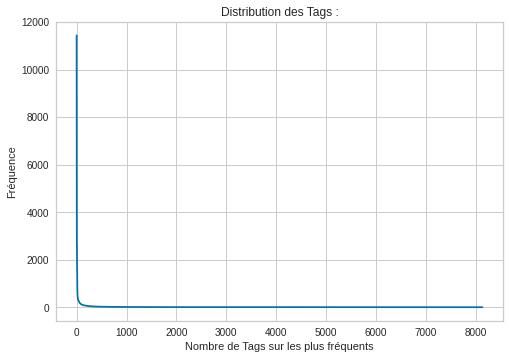

In [ ]:
tag_counting_graph = tag_counting.sort_values(['Counts'], ascending=False)
plt.plot(tag_counting_graph['Counts'].values)
plt.grid(True)
plt.title("Distribution des Tags :")
plt.xlabel("Nombre de Tags sur les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

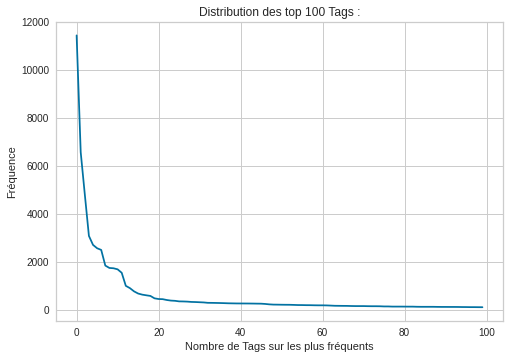

In [ ]:
plt.plot(tag_counting_graph['Counts'][0:100].values)
plt.grid(True)
plt.title("Distribution des top 100 Tags :")
plt.xlabel("Nombre de Tags sur les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

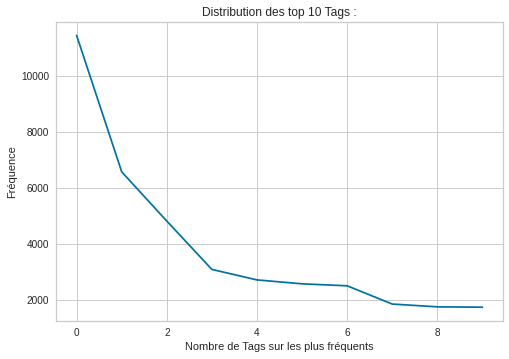

In [ ]:
plt.plot(tag_counting_graph['Counts'][0:10].values)
plt.grid(True)
plt.title("Distribution des top 10 Tags :")
plt.xlabel("Nombre de Tags sur les plus fréquents")
plt.ylabel("Fréquence")

On peut voir qu'à partir de 6 on commence à avoir une fréquence inférieur à 1000, on aurait donc tendance à garder 1000 en fréquence.

In [ ]:
print("{} tags qui sont utilisés plus de 10 fois".format(tag_counting[tag_counting["Counts"]>10].shape[0]))
print("{} tags qui sont utilisés plus de 25 fois".format(tag_counting[tag_counting["Counts"]>25].shape[0]))
print("{} tags qui sont utilisés plus de 50 fois".format(tag_counting[tag_counting["Counts"]>50].shape[0]))
print("{} tags qui sont utilisés plus de 100 fois".format(tag_counting[tag_counting["Counts"]>100].shape[0]))
print("{} tags qui sont utilisés plus de 200 fois".format(tag_counting[tag_counting["Counts"]>200].shape[0]))
print("{} tags qui sont utilisés plus de 500 fois".format(tag_counting[tag_counting["Counts"]>500].shape[0]))

989 tags qui sont utilisés plus de 10 fois
438 tags qui sont utilisés plus de 25 fois
243 tags qui sont utilisés plus de 50 fois
119 tags qui sont utilisés plus de 100 fois
57 tags qui sont utilisés plus de 200 fois
19 tags qui sont utilisés plus de 500 fois


In [ ]:
def bag_of_words(texts):
    data = texts
    cv = CountVectorizer(min_df = 1000).fit(data)
    bow = cv.transform(data)


    data = pd.DataFrame({'count': bow.sum(axis=0).A1,
                         'word': cv.get_feature_names_out()
                         })
    data = data.sort_values(by=['count'], ascending=False)

    return (data, cv, bow)

### Création d'un DataFrame de visualisation + une matrice :

In [ ]:
df_modellisation

,corpus_preprocessing,tags_preprocessing,corpus_finish,tags_finish,tags_final,len_tags_final
0,"[delete, form, loop, form, option, image, inpu...","[php, foreach, pdo, associative-array]",delete form loop form option image input form ...,php foreach pdo associative-array,[php],1
1,"[df, pd.DataFrame, df.isnull, df2.set_index, d...","[python, dataframe]",df pd.DataFrame df.isnull df2.set_index df2.in...,python dataframe,"[python, dataframe]",2
2,"[script, mysql, sql, path, way, path, path]","[mysql, sql, script]",script mysql sql path way path path,mysql sql script,[sql],1
3,"[verification, user, authenticationI, verify, ...","[python, oauth-2.0, jwt, rsa, jwk]",verification user authenticationI verify pytho...,python oauth-2.0 jwt rsa jwk,[python],1
4,"[work, context, manager, example, manager, fil...","[python, contextmanager]",work context manager example manager file sugg...,python contextmanager,[python],1
...,...,...,...,...,...,...
65995,"[jira, cloud, jira, cloud, code, line, connect...","[python, jira, jira-rest-api, python-jira]",jira cloud jira cloud code line connection err...,python jira jira-rest-api python-jira,[python],1
65997,"[logout, error, authentication, register, logi...","[python, django, postman]",logout error authentication register login reg...,python django postman,[python],1
65998,"[code, workingI, game, problem, code, function...",[python],code workingI game problem code function numbe...,python,[python],1
66000,"[way, distance, arraysI, z, y1, z1, yN, zN, b,...","[python, loops, euclidean-distance]",way distance arraysI z y1 z1 yN zN b way find ...,python loops euclidean-distance,[python],1


In [ ]:
%%time
data_bow,cv, bow = bag_of_words(df_modellisation["corpus_finish"])

CPU times: user 1.48 s, sys: 13 ms, total: 1.49 s
Wall time: 1.51 s


### Mise en pickle :

In [ ]:
pickle.dump(bow, open('/content/drive/My Drive/Colab Notebooks/Stackoverflow/bow.pkl', 'wb'))

In [ ]:
pickle.dump(cv, open('/content/drive/My Drive/Colab Notebooks/Stackoverflow/cv.pkl', 'wb'))

In [ ]:
print("Nombres de questions pour le BOW:", bow.shape[0])
print("Nombres de tags uniques pour le BOW :", bow.shape[1])

Nombres de questions pour le BOW: 43596
Nombres de tags uniques pour le BOW : 98


#### Visualisation : 

data_bow[data_bow['count']<1000].sample(10) Utilisation de ce type de formule pour choisir l'optimum de mot.

In [ ]:
data_bow

,count,word
13,21939,code
96,11131,way
33,10934,file
35,10914,function
29,10714,error
...,...,...
76,1248,run
61,1196,please
20,1188,data
11,1179,check


### Vectorisation :

In [ ]:
%%time
data_bow_vec = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names_out())
data_bow_vec.index = df_modellisation.index

CPU times: user 16.8 ms, sys: 0 ns, total: 16.8 ms
Wall time: 18.4 ms


In [ ]:
data_bow_vec

,access,advance,anyone,anything,app,application,array,button,call,case,...,text,thing,time,type,use,user,value,version,way,work
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65995,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
65998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


In [ ]:
%%time
score_Sparsicity_bow = bow.todense()
print("Sparsicity: ", '\033[1m'+ str((((score_Sparsicity_bow > 0).sum()/score_Sparsicity_bow.size)*100).round(2)) + '\033[0m' , "%")

Sparsicity:  5.53 %
CPU times: user 22.9 ms, sys: 21.5 ms, total: 44.4 ms
Wall time: 46.8 ms


Afficher la Sparsicity (sous forme de nombre ou de proportion) d'une matrice.

Par exemple, . 99% de  Sparsicity signifie que 99 % des valeurs sont nulles. De même, une Sparsicity de 0 signifie que la matrice est entièrement dense.

# TF-IDF :

La formule du tf-Idf est  : __poids = fréquence du terme * indicateur similarité__

__Pour extraire les informations on utilise :__

__NER (Named Entity Recognition) :__ reconnaître des personnes, endroits, entreprises, etc.

__Extraction de relations :__ essayer d'extraire des relations sémantiques entre différents termes du texte. Par exemple, des relations familiales ("Marie est l'enfant de Patrick") spatiales ("Le piano est devant la fenêtre"), etc. Ces informations peuvent ensuite être stockées dans une base de données relationnelles ou un graphe.

__Extraction d'événements :__ extraire des actions qui arrivent à nos entités. Par exemple "le cours de l'action X a augmenté de 5%" ou bien "le président à déclaré X dans son discours"

__POS Tagging (Part-of-Speech Tagging) :__ représente les méthodes qui récupèrent la nature grammatical des mots d’une phrase - nom, verbe, adjectif, etc. Ce sont des propriété qui peuvent servir de caractéristiques utile lors de la création de certains modèles

In [ ]:
def Tfidf (texts) :
    data = texts
    tf = TfidfVectorizer(min_df = 1000).fit(data) # on choisit de prendre que les mots avec 200 itérations
    idf = tf.transform(data)
    
    data = pd.DataFrame({'count': idf.sum(axis=0).A1,
                         'word': tf.get_feature_names_out()
                         })
    data = data.sort_values(by=['count'], ascending=False)
    data['count'] = round(data['count'])
    
    return(data, tf, idf)

### Création d'un DataFrame de visualisation + une matrice :

In [ ]:
%%time
Data_idf,tf, idf = Tfidf(df_modellisation["corpus_finish"])

CPU times: user 1.85 s, sys: 32.3 ms, total: 1.88 s
Wall time: 2.55 s


In [ ]:
print("Nombres de questions pour le TF-IDF :", idf.shape[0])
print("Nombres de tags uniques pour le TF-IDF :", idf.shape[1])

Nombres de questions pour le TF-IDF : 43596
Nombres de tags uniques pour le TF-IDF : 98


### Mise en pickle :

In [ ]:
pickle.dump(idf, open('/content/drive/My Drive/Colab Notebooks/Stackoverflow/idf.pkl', 'wb'))

In [ ]:
pickle.dump(tf, open('/content/drive/My Drive/Colab Notebooks/Stackoverflow/tf.pkl', 'wb'))

#### Visualisation : 

In [ ]:
Data_idf

,count,word
13,3915.0,code
29,2507.0,error
96,2454.0,way
35,2324.0,function
33,2291.0,file
...,...,...
15,412.0,com
76,407.0,run
11,397.0,check
20,396.0,data


### Vectorisation :

In [ ]:
data_tfidf_vec = pd.DataFrame(idf.toarray(), columns=cv.get_feature_names_out())
data_tfidf_vec.index = df_modellisation.index
data_tfidf_vec.head()

,access,advance,anyone,anything,app,application,array,button,call,case,...,text,thing,time,type,use,user,value,version,way,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.140948,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.183365,0.000000,0.0,0.0,0.000000,0.181887
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.507755,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.630151,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.206563,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.293865


In [ ]:
%%time
score_Sparsicity_tfidf = idf.todense()
print("Sparsicity: ", '\033[1m'+ str((((score_Sparsicity_tfidf > 0).sum()/score_Sparsicity_tfidf.size)*100).round(2)) + '\033[0m' , "%")

Sparsicity:  5.53 %
CPU times: user 18.4 ms, sys: 53.9 ms, total: 72.3 ms
Wall time: 72.8 ms


Afficher la Sparsicity (sous forme de nombre ou de proportion) d'une matrice.

Par exemple, . 99% de  Sparsicity signifie que 99 % des valeurs sont nulles. De même, une Sparsicity de 0 signifie que la matrice est entièrement dense.

On a donc 2.01% de données avec un 0 dans notre tf-idf.

# ACP :

Le code provient d'un cours d'OpenClassrooms.

In [ ]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10, 10))

            # Determine the limits of the chart
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # Display variable names
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # Display circle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)


def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig = plt.figure(figsize=(7, 6))

            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            # plt.show(block=False)


def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

In [ ]:
# constitution du dataset pour l'ACP
df_acp = data_tfidf_vec

n_comp = 50
scaler = StandardScaler()
pca = PCA(n_components=n_comp)

X = df_acp.values
features = df_acp.columns
X_scaled = scaler.fit_transform(X)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_

In [ ]:
%%time
PCA_decomposition = decomposition.PCA(n_components=50)
PCA_decomposition.fit(X_scaled)

CPU times: user 1.18 s, sys: 892 ms, total: 2.07 s
Wall time: 1.52 s


PCA(n_components=50)

In [ ]:
print('\033[1m' + 'Le pourcentage de variance expliqué pour 50 composantes est de :' + '\033[0m')
print('')
print((PCA_decomposition.explained_variance_ratio_)*100)
print('')
print(f"Le pourcentage de variance expliqué cumulé pour 50 composantes est de :",
      '\033[1m' + str(round((PCA_decomposition.explained_variance_ratio_.sum())*100, 2)) + '\033[0m', '%')

Le pourcentage de variance expliqué pour 50 composantes est de :

[1.82958676 1.48050332 1.36785094 1.34191567 1.26672588 1.24817243
 1.22333391 1.19349991 1.15658031 1.14383388 1.13759742 1.11612378
 1.09538399 1.08135378 1.07673427 1.07420121 1.06928907 1.05808322
 1.04973125 1.04743329 1.03997264 1.0372739  1.03247406 1.02381189
 1.02081021 1.01971905 1.01414112 1.00725416 1.00537    1.00145188
 1.00093218 0.99507615 0.99421568 0.99363689 0.9902398  0.98872048
 0.98653538 0.98051152 0.97857117 0.97666195 0.97141729 0.96938544
 0.96564216 0.96187379 0.95779347 0.95369087 0.94992549 0.94467356
 0.94301917 0.94220275]

Le pourcentage de variance expliqué cumulé pour 50 composantes est de : 53.7 %


In [ ]:
print('\033[1m' + 'Le pourcentage de variance expliqué pour 20 composantes est de :' + '\033[0m')
print('')
print((PCA_decomposition.explained_variance_ratio_)*100)
print('')
print(f"Le pourcentage de variance expliqué cumulé pour 20 composantes est de :",
      '\033[1m' + str(round((PCA_decomposition.explained_variance_ratio_.sum())*100, 2)) + '\033[0m', '%')

Le pourcentage de variance expliqué pour 20 composantes est de :

[0.96495822 0.77120196 0.70003572 0.67593694 0.65970298 0.63895392
 0.61896885 0.60445556 0.58898428 0.55827759 0.5476665  0.53682697
 0.53337572 0.528332   0.5241996  0.51987651 0.5154221  0.51155128
 0.5018976  0.49666637 0.493563   0.48965796 0.48817981 0.48557751
 0.48328125 0.48190928 0.47740734 0.47538302 0.47041268 0.46647092
 0.46605759 0.46546182 0.46324034 0.46130141 0.45999106 0.45921392
 0.45713921 0.45527635 0.45380844 0.45204746 0.45100821 0.44922503
 0.44777433 0.44649549 0.44579954 0.44478781 0.44368029 0.44091105
 0.44011503 0.43835857 0.43766682 0.43753546 0.43700396 0.43549174
 0.4350042  0.43468903 0.43291953 0.43206762 0.43120786 0.43064617
 0.43037152 0.4301845  0.42945579 0.42846949 0.42768852 0.42654161
 0.42626156 0.42579543 0.42528809 0.42446063 0.4241518  0.42396216
 0.42364892 0.42243052 0.42236065 0.42174786 0.42137334 0.42122297
 0.4202759  0.41936843 0.41925554 0.41862952 0.41827273 0.41782

### Visualisation des dimensions :

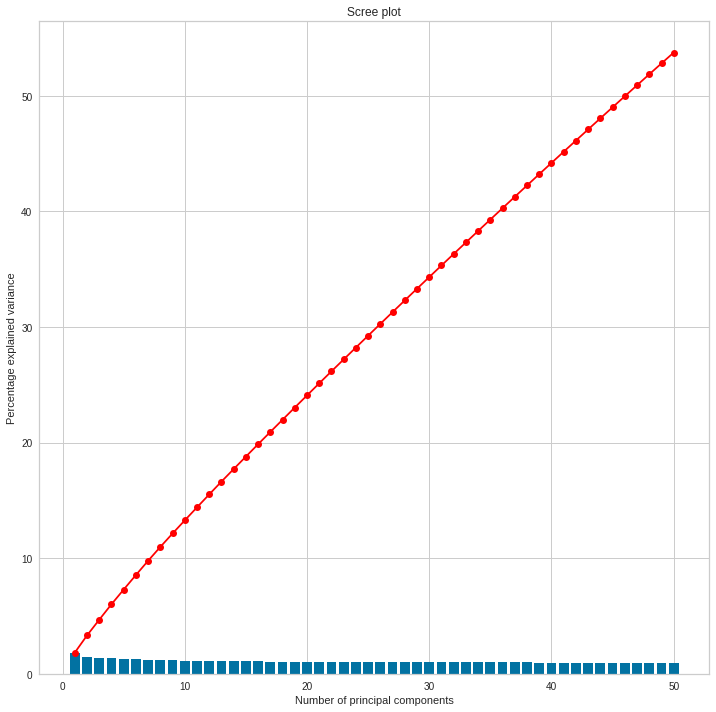

In [ ]:
plt.figure(figsize=(12, 12))
display_scree_plot(pca)

On peut voir qu'au fur et à mesure cela réduit, mais que le pourcentage de variance expliquée est relativement faible..

### Vectorisation de la PC1 et PC2 :

<Figure size 1440x1440 with 0 Axes>

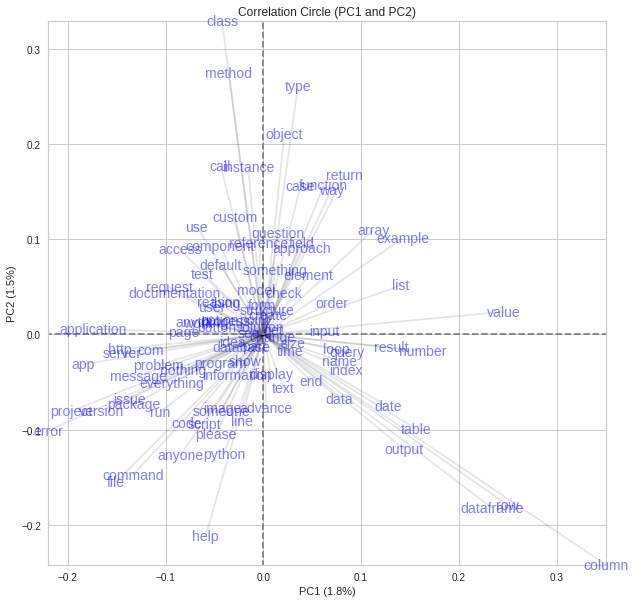

In [ ]:
plt.figure(figsize=(20, 20))
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

On peut voir ici que la PCA n'est pas pertinente, de ce fait on ne retiendra pas l'acp.

# LDA :

source : https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

Hypothése de la LDA à confirmer :

    - Chaque document du corpus est un ensemble de mots sans ordre (bag-of-words)
    
    - Chaque document n'aborde un certain nombre de thèmes dans différentes proportions qui lui sont propres p(θm)

    - Chaque mot possède une distribution associée à chaque thème p(ϕk)
    
    - Zn représente le thème du mot Wn


La LDA est surtout optimisée pour le BOW, on utilisera donc pas le tf-idf ici.

#### Création d'un dictionnaire :

In [ ]:
#creating a dictionary

gensim_dictionary = corpora.Dictionary(df_modellisation["corpus_preprocessing"])

# corpus 
texts = df_modellisation["corpus_preprocessing"]

# building a corpus for the topic model

gensim_corpus = [gensim_dictionary.doc2bow(text) for text in texts]

#### Visualisation du corpus et de sa fréquence :

In [ ]:
#printing the corpus we created above.

print(gensim_corpus[:3]) 

In [ ]:
#we can print the words with their frequencies.

[[(gensim_dictionary[id], freq) for id, freq in cp] for cp in gensim_corpus[:4]] 

[[(':allocator', 1), ('construct', 1), ('lot', 1), ('performance', 1)],
 [('advance', 1),
  ('anything', 1),
  ('cache', 2),
  ('cause', 1),
  ('code', 1),
  ('configuration', 1),
  ('example', 1),
  ('handler', 1),
  ('headless', 1),
  ('integration', 1),
  ('page', 1),
  ('path', 1),
  ('process', 1),
  ('question', 2),
  ('regeneration', 1),
  ('request', 1),
  ('restart', 1),
  ('route', 2),
  ('setup', 1),
  ('site', 1),
  ('time', 1)],
 [('code', 3),
  ('Chapter', 1),
  ('bite', 1),
  ('conflict', 1),
  ('consistency', 5),
  ('contain', 1),
  ('everything', 1),
  ('field', 2),
  ('happens-before', 2),
  ('indentation', 1),
  ('order', 1),
  ('output', 3),
  ('problem', 1),
  ('program', 7),
  ('race', 2),
  ('read', 1),
  ('relationship', 2),
  ('result', 1),
  ('runtime', 1),
  ('something', 1),
  ('statement', 4),
  ('synchronized-with', 1),
  ('v2', 1),
  ('write', 1)],
 [('case', 1), ('expression', 2), ('python', 1), ('work', 2)]]

### Recherche de topics optimum :

In [ ]:
%%time
# stock result of coherence and perplexity score
results =[]

# loop for find the best topic :
for n_topics in [7, 8, 9, 10, 11, 12, 13, 14, 15]:
    
    # creating the LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=gensim_corpus,
                                                id2word=gensim_dictionary,
                                                num_topics=n_topics,
                                                random_state=0,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto'
                                               )

    # creation score :
    Perplexity_Score = lda_model.log_perplexity(gensim_corpus)
    Coherence_Score = CoherenceModel(model=lda_model,
                                     texts=texts,
                                     dictionary=gensim_dictionary,
                                     coherence='c_v'
                                     ).get_coherence()
    
    # Visualize the results :
    print('-'*40)
    print(f" For {n_topics} topics :")
    print('-'*40)
    print('')

    # Compute Perplexity
    print(f"Perplexity Score : {Perplexity_Score}") # a measure of how good the model is. lower the better.
    print('')
    
    # Compute Coherence Score
    print(f"Coherence Score : {Coherence_Score}")
    
    results.append([n_topics, Perplexity_Score, Coherence_Score])
# CPU times: user 1h 7min 56s, sys: 3min 11s, total: 1h 11min 8s
# Wall time: 1h 12min 9s

KeyboardInterrupt: 

#### Graphique d'optimisation du choix des topics :

In [ ]:
fig,ax= plt.subplots()

# 1st line :
ax.plot([line[0] for line in results],
        [line[1] for line in results],
        color = "b",
        label = 'perplexity_score')
ax.set_ylabel('perplexity_score')
ax.set_xlabel('Number of Topics')


# to have same size for score :
ax2 = ax.twinx()

# 2nd line :
ax2.plot([line[0] for line in results],
        [line[2] for line in results],
        color = "g",
        label = 'coherence_score')
ax2.set_ylabel('coherence_score')

fig.legend()

On a confirmation que le nombre de LDA est 7.

#### Sauvegarde pickle des résultats globaux :

In [ ]:
topic_lda = pickle.dump(results, open('topic_lda.pkl', 'wb')) # pour le save
# results = pickle.load(open('topic_lda.pkl', 'rb')) # pour le load

## LDA optimisé par topic :

### Création du modéle de LDA avec le nombre de topics opti :

In [ ]:
%%time

# creating the LDA model
lda_model_v2 = gensim.models.ldamodel.LdaModel(corpus=gensim_corpus,
                                               id2word=gensim_dictionary,
                                               num_topics=8,
                                               random_state=0,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)

# creation score :
Perplexity_Score = lda_model_v2.log_perplexity(gensim_corpus)
Coherence_Score = CoherenceModel(model=lda_model,
                                 texts=texts,
                                 dictionary=gensim_dictionary,
                                 coherence='c_v'
                                ).get_coherence()
    
# Compute Perplexity
print(f"Perplexity Score : {Perplexity_Score}") # a measure of how good the model is. lower the better.
print('')
    
# Compute Coherence Score
print(f"Coherence Score : {Coherence_Score}")

KeyboardInterrupt: 

#### Visualization of Topics :

In [ ]:
for idx, topic in lda_model.show_topics(formatted=False, num_words=10):
    print(" \033[1m Topic: {} \033[0m:\n \nWords:\n {} ".format(
        idx, ' | '.join([w[0] for w in topic])))

  Topic: 0 :
 
Words:
 code | way | use | problem | example | work | something | time | question | page 
  Topic: 1 :
 
Words:
 error | file | project | version | application | issue | line | help | http | command 
  Topic: 2 :
 
Words:
 value | output | default | parameter | program | query | constructor | window | statement | definition 
  Topic: 3 :
 
Words:
 list | change | anyone | button | container | folder | docker | state | directory | path 
  Topic: 4 :
 
Words:
 array | column | object | view | python | return | date | parent | level | position 
  Topic: 5 :
 
Words:
 image | app | server | element | configuration | event | browser | task | log | machine 
  Topic: 6 :
 
Words:
 field | input | build | response | load | header | link | string | connection | web 
  Topic: 7 :
 
Words:
 function | class | type | method | component | test | number | property | instance | custom 


### Visualization Pyldavis :

In [ ]:
%%time
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, gensim_corpus, gensim_dictionary)
LDAvis_prepared

/Users/aurelien_gorguet/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aurelien_gorguet/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aurelien_gorguet/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aurelien_gorguet/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for altern

CPU times: user 2.57 s, sys: 160 ms, total: 2.73 s
Wall time: 5.3 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.347374  0.285786       1        1  31.455220
1     -0.241724 -0.369425       2        1  21.912343
7      0.042669 -0.015933       3        1  13.003292
3      0.088192  0.030572       4        1   9.601480
2      0.102814  0.013776       5        1   7.619608
6      0.116196  0.019087       6        1   6.050682
5      0.118516  0.016858       7        1   5.622407
4      0.120711  0.019279       8        1   4.734969, topic_info=              Term          Freq         Total Category  logprob  loglift
8             code  48449.000000  48449.000000  Default  30.0000  30.0000
63           error  36171.000000  36171.000000  Default  29.0000  29.0000
94            file  32289.000000  32289.000000  Default  28.0000  28.0000
154       function  23870.000000  23870.000000  Default  27.0000  27.0000
60             way  37428.000000  37428.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
298         advice    629.837094    630.767311   Topic8  -5.0380   3.0487
1832         popup    602.118525    603.049085   Topic8  -5.0830   3.0487
1206          hide    565.445558    566.375443   Topic8  -5.1458   3.0486
1749  registration    545.430768    546.360550   Topic8  -5.1818   3.0485
2676          card    538.481086    539.410476   Topic8  -5.1947   3.0485

[274 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
165       2  0.999897   access
942       4  0.999623  address
298       8  0.998784   advice
749       8  0.999486  android
455       4  0.999597   answer
...     ...       ...      ...
60        1  0.999983      way
753       6  0.999732      web
1336      7  0.999101  webpack
342       5  0.999810   window
55        1  0.999947     work

[248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 8, 4, 3, 7, 6, 5])

#### Sauvegarde pickle des résultats :

In [ ]:
#lda_model_v2_pkl = pickle.dump(lda_model_v2, open('topic_lda_v2.pkl', 'wb')) # pour le save
lda_model = pickle.load(open('topic_lda_v2.pkl', 'rb')) # pour le load

# NMF :

En algèbre linéaire et en analyse à plusieurs variables, la factorisation matricielle non négative est un groupe d’algorithmes qui permet de factoriser une matrice V en deux matrices (W et H) qui ne contiennent que des valeurs positives ou nulles et dont le produit est proche de V.

source : https://datafranca.org/wiki/Factorisation_matricielle_non_négative

source : https://predictivehacks.com/topic-modelling-with-nmf-in-python/

source : https://notebook.community/piskvorky/gensim/docs/notebooks/nmf_tutorial

In [ ]:
from gensim.models import CoherenceModel, LdaModel, TfidfModel
from gensim.models.basemodel import BaseTopicModel
from gensim.models.nmf import Nmf as GensimNmf
from gensim.parsing.preprocessing import preprocess_string
import gensim.downloader
from gensim import matutils, utils
from gensim.corpora import Dictionary

In [ ]:
"""%%time
X = idf 
results_nmf = []
# loop for find the best topic :
for n_topics in [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    # Create an NMF instance: model
    # the 10 components will be the topics
    nmf_model = NMF(n_components=n_topics, random_state=0)
    
     
    # Fit the model to TF-IDF
    model.fit(X)
 
    # Transform the TF-IDF: nmf_features
    nmf_features = model.transform(X)
    
    coherence_Score = CoherenceModel(model=nmf_model,
                                     texts=nmf_features,
                                     dictionary=dictionary,
                                     coherence='c_v'
                                     ).get_coherence()"""

In [ ]:
"""%%time
# stock result of coherence and perplexity score
results_nmf = []

# loop for find the best topic :
for n_topics in [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:

    # creating the LDA model
    nmf_model = GensimNmf(corpus=idf,
                          num_topics=n_topics,
                          id2word=dictionary,
                          chunksize=1000,
                          passes=5,
                          eval_every=10,
                          minimum_probability=0,
                          random_state=0,
                          kappa=1,
                         )

    # creation score :
    Coherence_Score = CoherenceModel(model=nmf_model,
                                     texts=texts,
                                     dictionary=dictionary,
                                     coherence='c_v'
                                     ).get_coherence()

    # Visualize the results :
    print('-'*40)
    print(f" For {n_topics} topic :")
    print('-'*40)
    print('')

    # Compute Coherence Score
    print(f"Coherence Score : {Coherence_Score}")

    results_nmf.append([n_topics, Coherence_Score])"""